In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn import datasets, linear_model
from sklearn import preprocessing

# Because the original data contains some redundant information
# we do some preprocessing to the data and reload
with open('./sum.csv', 'r') as f:
    f1 = open('./inter.csv', 'w')
    for lines in f:
        lines = lines.split('\t')[0:9]
        lines = '\t'.join(lines)
        f1.write(lines + '\n')

df = pd.read_csv('./inter.csv', header=None, sep='\t')

Nine columns of the datasets:
1. ID: video ID
2. AOR: video Author
3. AGE: days between the time the video was published and the time of establishment of Youtube
4. CATO: video Catergory
5. LEN: video Length
6. VEW: video View count
7. RATE: video rate
8. RATI: how many people rated
9. COM: number of comments

In [2]:
df.columns = ['ID', 'AOR', 'AGE', 'CATO', 'LEN', 'VEW', 'RATE', 'RATI', 'COM']

numbers_sub = ['AGE','LEN', 'VEW', 'RATE', 'RATI', 'COM']
sub2 = []
sub3 = []

df.head()

,ID,AOR,AGE,CATO,LEN,VEW,RATE,RATI,COM
0,D6frFp-VwHs,yetube,821,Entertainment,30,554455,3.54,2813,422
1,0Lg4i2C6zws,TNAwrestling,821,Sports,573,191461,4.46,217,111
2,UJpgxqYGws4,jrc0803,820,Sports,55,160852,4.09,486,423
3,BAPwg5nCKxE,milanoss,820,Film & Animation,578,170536,4.06,82,91
4,vVJ06ixj19Q,PimpimusPrime,820,Film & Animation,29,95950,4.61,134,185


In [3]:
df.describe()

,AGE,LEN,VEW,RATE,RATI,COM
count,51036.000000,51036.000000,5.103600e+04,51036.000000,51036.000000,51036.000000
mean,693.086645,209.748668,6.531571e+03,3.634817,16.374794,11.222235
std,116.886062,191.705518,2.194632e+04,1.814369,54.863580,54.473848
min,136.000000,0.000000,0.000000e+00,0.000000,0.000000,-18.000000
25%,621.000000,76.000000,3.110000e+02,3.000000,1.000000,0.000000
50%,730.000000,172.000000,1.396000e+03,4.560000,5.000000,3.000000
75%,788.000000,276.000000,5.571250e+03,5.000000,15.000000,10.000000
max,822.000000,4716.000000,2.142970e+06,5.000000,4625.000000,7685.000000


We plan to use two different scaling method to scale the data:
1. standard scaling
2. Min Max scaling

In [4]:
df = df[(df['LEN'] > 10) & (df['RATI'] > 0) & (df['COM'] > 0)]


df_numbers = df[numbers_sub]
#df_numbers['VEW'] = df_numbers['VEW'].map(lambda x: preprocessing.Binarizer(threshold=5000).transform(x))
#df_numbers['VEW'] = df_numbers['VEW'].map(lambda x: x[0][0])

df_numbers.describe()

,AGE,LEN,VEW,RATE,RATI,COM
count,35200.000000,35200.000000,3.520000e+04,35200.000000,35200.000000,35200.000000
mean,683.008608,222.628011,8.835884e+03,4.386981,22.897244,15.988580
std,120.178153,185.644207,2.575293e+04,0.832377,64.824021,62.128626
min,136.000000,11.000000,6.000000e+00,1.000000,1.000000,1.000000
25%,605.000000,92.000000,8.420000e+02,4.160000,4.000000,2.000000
50%,717.000000,190.000000,2.796500e+03,4.710000,9.000000,6.000000
75%,782.000000,287.000000,8.417500e+03,5.000000,22.000000,15.000000
max,822.000000,4576.000000,2.142970e+06,5.000000,4625.000000,7685.000000


In [5]:
df_numbers_maxmin = df_numbers.apply(lambda x: preprocessing.MinMaxScaler().fit_transform(x))
df_numbers_maxmin.describe()
#df_numbers.std(axis = 0)

/Users/huyang/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/huyang/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/huyang/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/huyang/anac

,AGE,LEN,VEW,RATE,RATI,COM
count,35200.000000,35200.000000,35200.000000,35200.000000,35200.000000,35200.000000
mean,0.797389,0.046359,0.004120,0.846745,0.004736,0.001951
std,0.175187,0.040667,0.012017,0.208094,0.014019,0.008085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.683673,0.017744,0.000390,0.790000,0.000649,0.000130
50%,0.846939,0.039211,0.001302,0.927500,0.001730,0.000651
75%,0.941691,0.060460,0.003925,1.000000,0.004542,0.001822
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


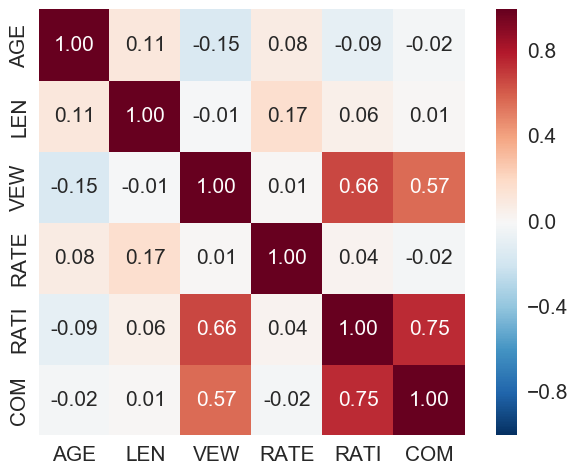

In [6]:
cm = np.corrcoef(df_numbers_maxmin.values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, 
                 cbar=True,
                annot=True, 
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=numbers_sub,
                xticklabels=numbers_sub)
plt.show()


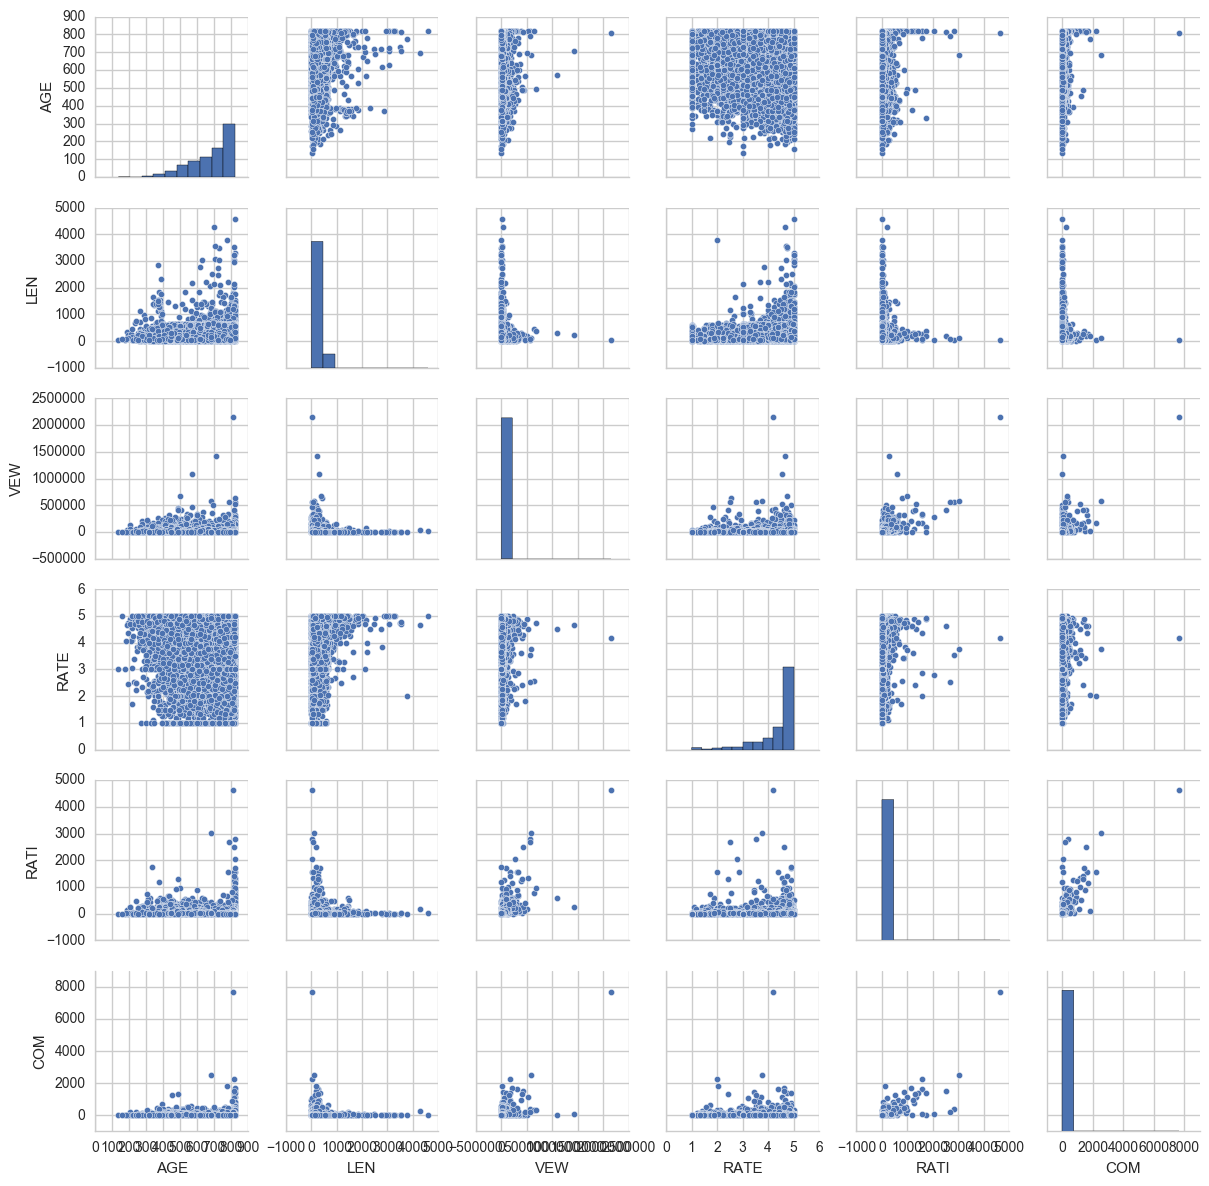

In [7]:
%matplotlib inline 

sns.set(style='whitegrid', context='notebook')
sns.pairplot(df_numbers, size=2);
plt.show()

In [8]:
def regression(X, Y):
    X_ = df_numbers_maxmin[X]
    Y_ = df_numbers_maxmin[Y]
    
    # split the data into 80(train)/20(test) partition
    X_train, X_test, Y_train, Y_test = train_test_split( X_, Y_,  test_size=0.2, random_state=42)

    # regression
    regr = linear_model.LinearRegression()
    regr.fit(X_train, Y_train)
    # predict
    Y_predict = regr.predict(X_test)
    
    # Slope
    print("Slopes: " + ','.join(map(str, regr.coef_)))
    # Intercept
    print("Intercept: %.9f" %regr.intercept_)
    # Score
    print("Test Score: %.3f" %regr.score(X_test, Y_test))
    # Mean Squared Error
    print("Mean squared error: %.2f" % np.mean((Y_predict - Y_test) ** 2))

In [9]:
fea = ['COM', 'RATI']
target = ['VEW']
regression(fea, target)

Slopes: [ 0.2387318   0.47198835]
Intercept: 0.001428855
Test Score: 0.385
Mean squared error: 0.00
